Javier Valle 

Carnet: 20159

1. Utilice la herramienta pefile para examinar el PE header y obtenga las DLL y las APIs que cada uno de los ejecutables utilizan. ¿Qué diferencias observa entre los ejemplos? ¿Existe algún indicio sospechoso en la cantidad de DLLs y las APIs llamadas?

In [12]:
import pefile

pe = pefile.PE("sample_vg655_25th.exe")

# Examinando las secciones
for entry in pe.DIRECTORY_ENTRY_IMPORT:
    print('DLL:', entry.dll)
    for imp in entry.imports:
        print('\t', imp.name)

DLL: b'KERNEL32.dll'
	 b'GetFileAttributesW'
	 b'GetFileSizeEx'
	 b'CreateFileA'
	 b'InitializeCriticalSection'
	 b'DeleteCriticalSection'
	 b'ReadFile'
	 b'GetFileSize'
	 b'WriteFile'
	 b'LeaveCriticalSection'
	 b'EnterCriticalSection'
	 b'SetFileAttributesW'
	 b'SetCurrentDirectoryW'
	 b'CreateDirectoryW'
	 b'GetTempPathW'
	 b'GetWindowsDirectoryW'
	 b'GetFileAttributesA'
	 b'SizeofResource'
	 b'LockResource'
	 b'LoadResource'
	 b'MultiByteToWideChar'
	 b'Sleep'
	 b'OpenMutexA'
	 b'GetFullPathNameA'
	 b'CopyFileA'
	 b'GetModuleFileNameA'
	 b'VirtualAlloc'
	 b'VirtualFree'
	 b'FreeLibrary'
	 b'HeapAlloc'
	 b'GetProcessHeap'
	 b'GetModuleHandleA'
	 b'SetLastError'
	 b'VirtualProtect'
	 b'IsBadReadPtr'
	 b'HeapFree'
	 b'SystemTimeToFileTime'
	 b'LocalFileTimeToFileTime'
	 b'CreateDirectoryA'
	 b'GetStartupInfoA'
	 b'SetFilePointer'
	 b'SetFileTime'
	 b'GetComputerNameW'
	 b'GetCurrentDirectoryA'
	 b'SetCurrentDirectoryA'
	 b'GlobalAlloc'
	 b'LoadLibraryA'
	 b'GetProcAddress'
	 b'GlobalF

Las diferencias que logro apreciar son las siguentes: 
- el tipo de nombres y las acciones que pueden llegar a ejectuar. Asimismo, el tipo de controles que pueden llegar a tener.
- Sí, dado que posee demasiados DLLs y bastantes APIs que no se sabe si son sanas o no.

2. Obtenga la información de las secciones del PE Header. ¿Qué significa que algunas secciones tengan como parte de su nombre “upx”? Realice el procedimiento de desempaquetado para obtener las llamadas completas de las APIs.

In [13]:
# Imprime la información de las secciones
for section in pe.sections:
    print(section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData)

b'.text\x00\x00\x00' 0x1000 0x69b0 28672
b'.rdata\x00\x00' 0x8000 0x5f70 24576
b'.data\x00\x00\x00' 0xe000 0x1958 8192
b'.rsrc\x00\x00\x00' 0x10000 0x349fa0 3448832


El hecho de que algunas secciones tengan como parte de su nombre el prefijo upx significa que eso va a reducir el tamaño del archivo malicioso y a veces puede ofuscar el contenido del archivo, por lo que eso podría provocar dificultades a los antivirus al momento de querer detectar archivos o comportamientos sosopechosos.

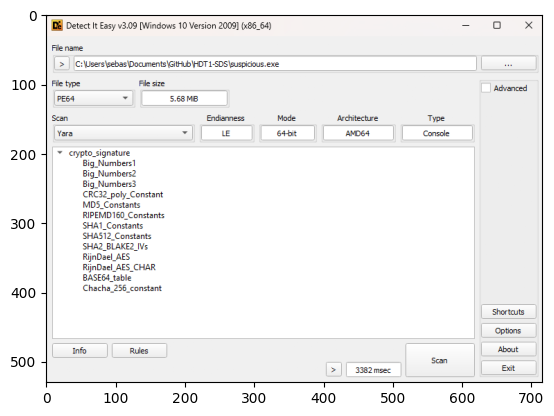

In [15]:
# Cargando la imagen APIs.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('APIs.png')
imgplot = plt.imshow(img)
plt.show()

3. Según el paper “Towards Understanding Malware Behaviour by the Extraction of API Calls”, ¿en que categoría sospechosas pueden clasificarse estos ejemplos en base a algunas de las llamadas a las APIs que realizan? Muestre una tabla con las APIs sospechosas y la categoría de malware que el artículo propone.

- Las cateogrías en las cuales se pueden clasificar los ejemplos que se hacen a partir de las llamadas podrían ser Get File Information, Change File Attributes y Copy/Delete Files.
- Tabla:

In [17]:
from prettytable import PrettyTable

# Define los datos
categorias = ['Behaviour 1', 'Behaviour 2', 'Behaviour 3', 'Behaviour 4', 'Behaviour 5', 'Behaviour 6']
apis = [['FindClose', 'FindNextFile', 'SearchPath', 'FindFirstFileName'], ['CloseHandle', 'DeleteFile', 'LinkTransacted', 'DeleteFileTransacted'], ['GetBinaryType', 'GetTempPath', 'GetLongPathName'], ['MoveFile', 'MoveFileEx', 'MoveFileWithProgress'], ['OpenFile', 'ReOpenFile', 'CreateFile'], ['SetFileAttributes', 'SetFileApisToOEM', 'etFileBandwidthReservation']]

# Crea una tabla PrettyTable
tabla = PrettyTable()

# Establece los nombres de las columnas
tabla.field_names = ['Categoría de Comportamiento Sospechoso', 'APIs Sospechosas']

# Añade las filas a la tabla
for categoria, api in zip(categorias, apis):
    tabla.add_row([categoria, ', '.join(api)])

# Imprime la tabla
print(tabla)

+----------------------------------------+-----------------------------------------------------------------+
| Categoría de Comportamiento Sospechoso |                         APIs Sospechosas                        |
+----------------------------------------+-----------------------------------------------------------------+
|              Behaviour 1               |      FindClose, FindNextFile, SearchPath, FindFirstFileName     |
|              Behaviour 2               |  CloseHandle, DeleteFile, LinkTransacted, DeleteFileTransacted  |
|              Behaviour 3               |           GetBinaryType, GetTempPath, GetLongPathName           |
|              Behaviour 4               |            MoveFile, MoveFileEx, MoveFileWithProgress           |
|              Behaviour 5               |                 OpenFile, ReOpenFile, CreateFile                |
|              Behaviour 6               | SetFileAttributes, SetFileApisToOEM, etFileBandwidthReservation |
+------------------

4. Investigue algunas de las funciones y DLLs utilizadas por el ejecutable e indique su propósito. 

- GetFileAttributesW: Esto permite que recupera los atributos del sistema de archivos para un archivo o directorio puntual.
- GetFileSizeEx: Esta función sirve para recuperar el tamaño del archivo especificado por el virus.
- InitializeCriticalSection: Es una función que sirve para inicializar un objeto de una sección crítica.
- ReadFile: Esta función lee los datos del archivo o dispostivo de E/S especificado.

5. Con la información recopilada hasta el momento, indique para el archivo ““sample_vg655_25th.exe” si es sospechoso o no, y cual podría ser su propósito. 

- Con la información recopilada, se puede llegar a la conclusión de que el archivo "sample_vg655_25th.exe" es sospechoso y su propósito podría ser que esté haciendo una especie de phishing en el sistema operativo. Asimismo, este archivo podría robar información del sistema operativo en donde se instaló por accidente.

6. Para el archivo “sample_vg655_25th.exe” obtenga el HASH usando el algoritmo SHA256.

In [19]:
import hashlib

def obtener_hash_sha256(ruta_al_archivo):
    sha256_hash = hashlib.sha256()

    with open(ruta_al_archivo, 'rb') as f:
        for bloque in iter(lambda: f.read(4096), b''):
            sha256_hash.update(bloque)

    return sha256_hash.hexdigest()

hash_del_archivo = obtener_hash_sha256('sample_vg655_25th.exe')
print('El hash SHA256 del archivo es:', hash_del_archivo)

El hash SHA256 del archivo es: ed01ebfbc9eb5bbea545af4d01bf5f1071661840480439c6e5babe8e080e41aa


7. Utilice la plataforma de análisis dinámico https://www.hybrid-analysis.com y cargue el archivo “sample_vg655_25th.exe”.¿Se corresponde el HASH de la plataforma con el generado? Si encontró información, indique cual. Incluya posibles capturas de pantalla, etc. ¿Se corresponde la información encontrada con el análisis realizado en el punto 5? 

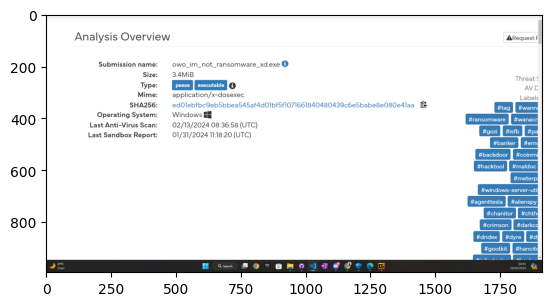

In [20]:
# Cargando la imagen analisis.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('analisis.png')
imgplot = plt.imshow(img)
plt.show()

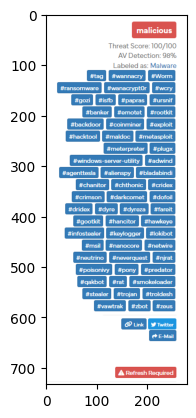

In [21]:
# Cargando la imagen analisis.png
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('analisis2.png')
imgplot = plt.imshow(img)
plt.show()

En este caso, se puede notar que la información coincide con el HASH encontrado por parte de Python. Asimismo, se podría decir que hay cierta información que coincide con la descrita en el inciso 5, dado que este virus busca robar información y busca encriptarla de alguna manera.